In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
filepath = r'https://raw.githubusercontent.com/infoshareacademy/jdsz3-zczasem/ProjektML/ProjektML/Dane/Carseats_Clean.csv'

In [3]:
df_col_descr = {
    'Sales' :  'Unit sales (in thousands) at each location',
    'CompPrice' : 'Price charged by competitor at each location',
    'Income' : 'Community income level (in thousands of dollars)',
    'Advertising' : 'Local advertising budget for company at each location (in thousands of dollars)',
    'Population' : 'Population size in region (in thousands)',
    'Price' : 'Price company charges for car seats at each site',
    'ShelveLoc' : 'A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site',
    'Age' : 'Average age of the local population',
    'Education' : 'Education level at each location',
    'Urban' : 'A factor with levels No and Yes to indicate whether the store is in an urban or rural location',
    'US' : 'A factor with levels No and Yes to indicate whether the store is in the US or not'}

In [4]:
df = pd.read_csv(filepath)
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban,US,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium
0,9.50,138,73,11,276,120,42,17,1,1,1,0,0
1,11.22,111,48,16,260,83,65,10,1,1,0,1,0
2,10.06,113,35,10,269,80,59,12,1,1,0,0,1
3,7.40,117,100,4,466,97,55,14,1,1,0,0,1
4,4.15,141,64,3,340,128,38,13,1,0,1,0,0


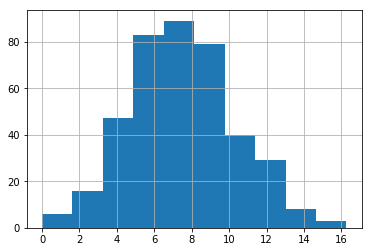

In [5]:
df.Sales.hist()

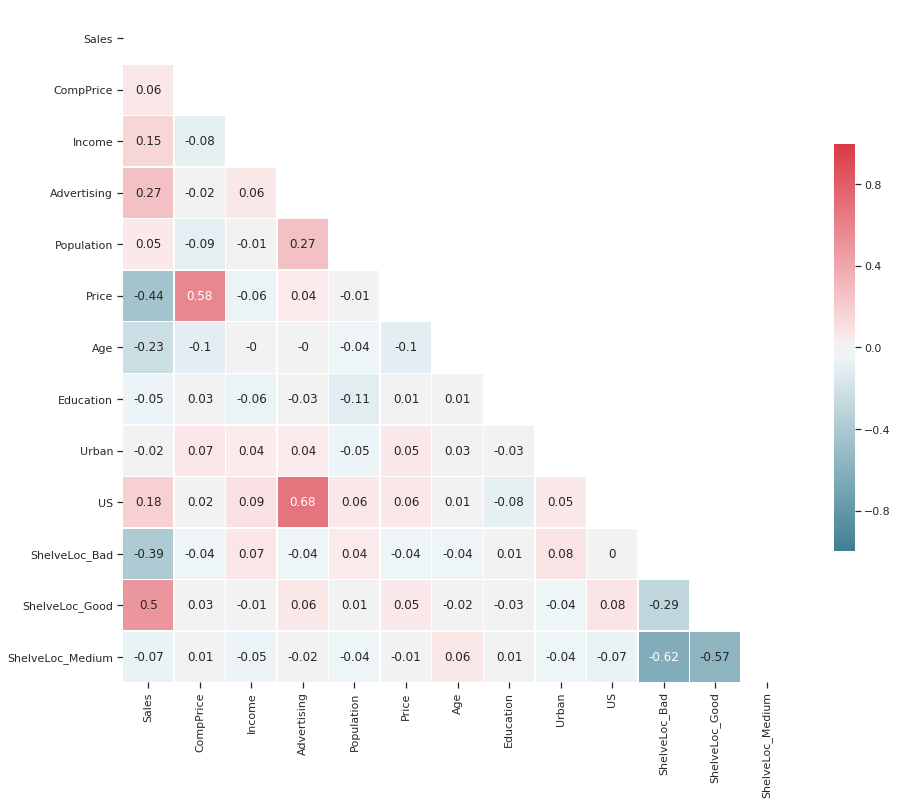

In [51]:
macierz_korelacji = df.corr().round(2)
mask = np.zeros_like(macierz_korelacji, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(15, 15))
sns.heatmap(macierz_korelacji, mask = mask, center = 0, vmin = -1, vmax = 1, annot = True, linewidths=.5,
            square = True, cmap = sns.diverging_palette(220, 10, as_cmap=True), cbar_kws={"shrink": .5})
#cmap = sns.diverging_palette(500, 500, as_cmap=True)

In [16]:
df['Sales_class'] = np.where(df['Sales'] < df['Sales'].quantile(0.333), 'LOW', np.where(df['Sales'] < df['Sales'].quantile(0.666), 'MED', 'HIGH'))

In [19]:
df['Sales_class'].value_counts()

HIGH    134
LOW     133
MED     133
Name: Sales_class, dtype: int64

/usr/bin/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


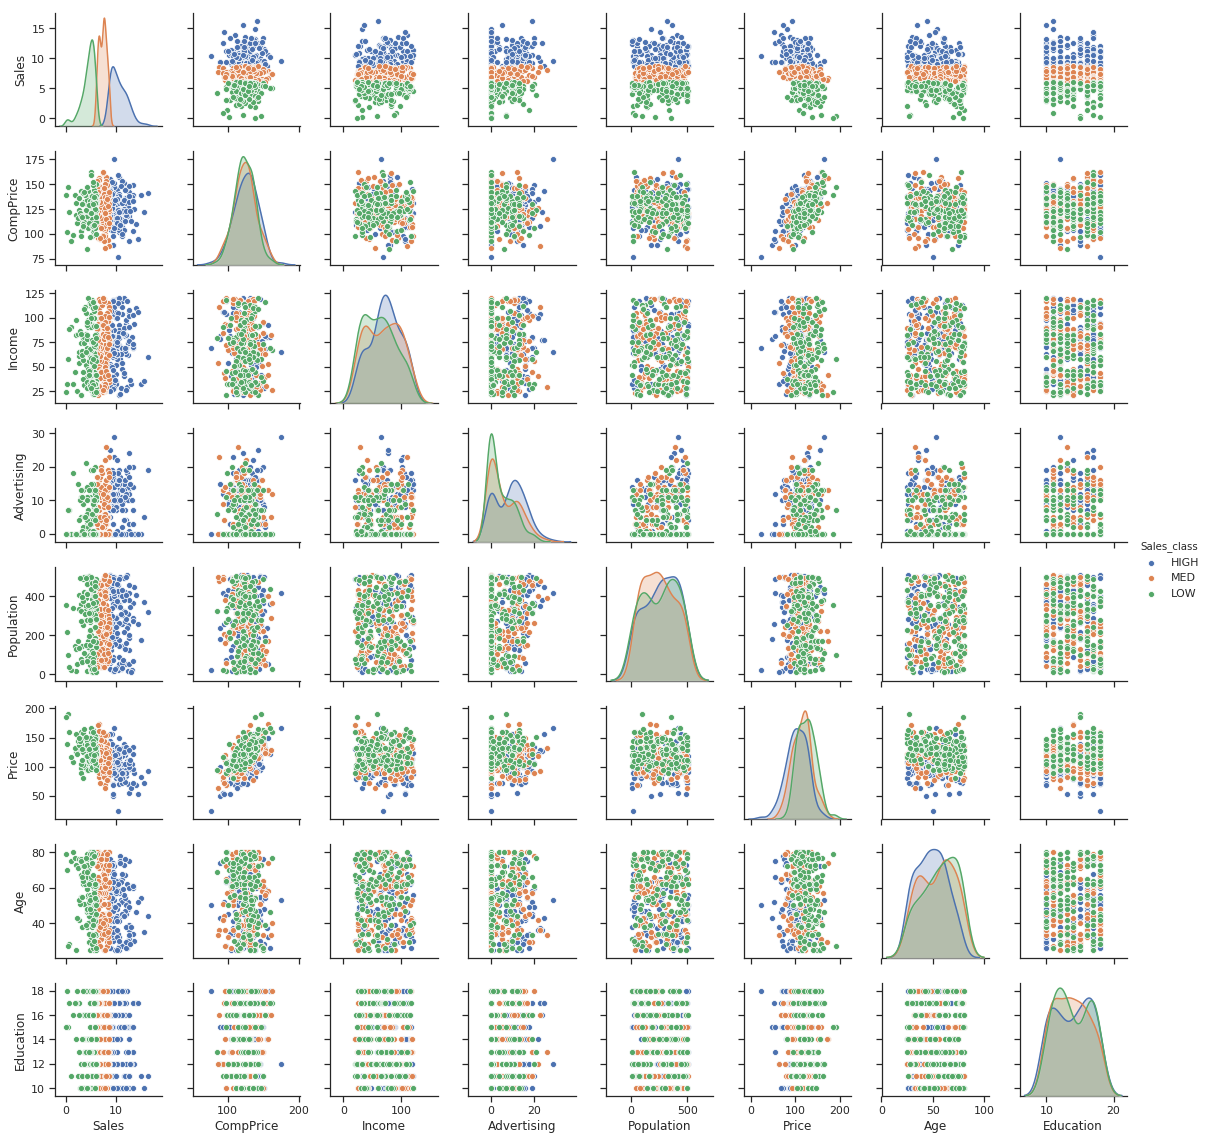

In [52]:
#plt.figure(figsize=(10, 10))
sns.set(style="ticks")
sns.pairplot(df.drop(columns=['Urban', 'US', 'ShelveLoc_Bad', 'ShelveLoc_Medium', 'ShelveLoc_Good']), size = 2, hue = 'Sales_class')